In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Income Simulation

### Tyler Amos

 _Monday 6 November 2017_
 

    

## Question 1:


In [42]:
# SIMULATION PARAMETERS:
seed_value = 3421
rh = 0.2 # Rho
sig = 0.1 # Sigma for generating random errors
mn = 0.0 # Mean for generating random errors
ndraws = 10000 # Number of draws
av_start_income = 80000 # Starting income for MACSS grad
g = 0.03 # Annual salary increase
start_yr = 2019
end_yr = 2058

# Parameters for Question 2:
q2_yr = 2019 # The year to be plotted
threshold_a = 100000 
threshold_b = 70000

# Parameters for Question 3:
loan_value = 95000

# Parameters for Question 4:
sig_q4 = 0.15
inc_q4 = 85000

In [43]:
def income_simulator(seed_value=seed_value, rh=rh, sig=sig, ndraws=ndraws, av_start_income=av_start_income, g=g,\
                     mn=mn, start_yr=start_yr, end_yr=end_yr):
    
    np.random.seed(seed_value)
    nyears = end_yr - start_yr+1

    # Generate an empty results table
    results_array = np.zeros((nyears, ndraws))
    
    # Generate an empty errors table
    errors_array = np.zeros((nyears, ndraws))

     # Fill the table with error values
    for i in range(ndraws):
        errors_array[:,i] = np.random.normal(mn, sig, nyears)

    # Now assign the first row to be the 2019 calculated incomes
    results_array[0,:] = np.exp(np.log(av_start_income) + errors_array[0,:])
 
    # Apply the formula to remaining rows
    for i in range(1, nyears):
        # apply the first term, 1-rho * (ln(average starting income) + annual raise * time elapsed since 2019)
        results_array[i,:] = np.exp((1-rh) * (np.log(av_start_income) + (g * (i))) + \
                            (rh * np.log(results_array[i-1,:])) +\
                            errors_array[i,:])
    return results_array

# Run the simulation and assign it to a variable
results_array = income_simulator()

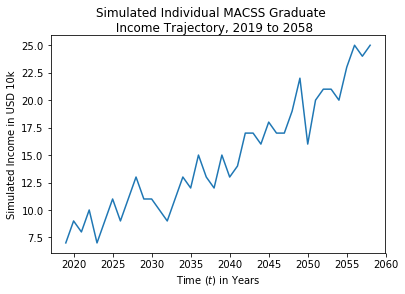

In [45]:
# Offset to ensure 2058 is included
x = np.arange(start_yr, end_yr+1, 1)
y = results_array[:,4]//10000
plt.plot(x, y)
plt.ylabel("Simulated Income in USD 10k")
plt.xlabel("Time ($t$) in Years")
plt.suptitle("Simulated Individual MACSS Graduate \n Income Trajectory, {} to {}".format(start_yr, end_yr));



## Question 2:

i) There will be 1.34% of the class earning above USD 100000.
ii) There will be 8.56% of the class earning above USD 70000.
iii) Incomes in 2019 approximate the normal distribution. The distribution of incomes is symmetrical and bell-shaped.


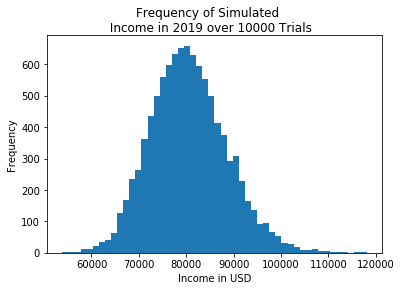

In [46]:
plt.hist(results_array[0,:], bins = 50)
plt.ylabel("Frequency")
plt.xlabel("Income in USD")
plt.suptitle("Frequency of Simulated \n Income in {} over {} Trials".format(q2_yr, ndraws))

def find_perc_above(threshold, results_array = results_array[0,:]):
    above = results_array[results_array > threshold]
    return float(len(above)/ndraws) * 100

perc_above_a = round(find_perc_above(threshold_a), 3)
perc_above_b = round(100.00-find_perc_above(threshold_b), 3)
print("i) There will be {}% of the class earning above USD {}.".format(perc_above_a, threshold_a))
print("ii) There will be {}% of the class earning above USD {}.".format(perc_above_b, threshold_b))
print("iii) Incomes in {} approximate the normal distribution. The distribution of incomes is symmetrical and bell-shaped.". format(q2_yr))


## Question 3:

Based on 10000 trials, 98.1% of MACSS graduates repay their loans within 10 years (i.e., before 2028).


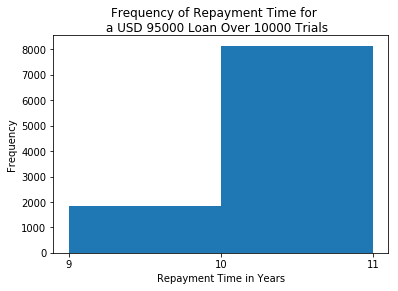

In [50]:
def loan_repayment(principal = loan_value, ndraws = ndraws, results_array = results_array):
    # Iterate through and find the year when principal is paid back, append that year
    time_to_repay = []
    for draw in range(ndraws):
        payment = 0
        for yr, inc in enumerate(results_array[:,draw]):
            payment += inc * .1
            if payment >= principal:
                time_to_repay.append(int(yr))
                break
                
    # Identify trials where repayment is made  in 10 years or less
    repayment_total = 0
    for i in time_to_repay:
        if i <= 10:
            repayment_total += 1
    perc_repaid_10_yr = repayment_total/ndraws * 100

    print("Based on {} trials, {}% of MACSS graduates repay their loans within 10 years (i.e., before 2028).".format(ndraws, perc_repaid_10_yr))
    
    # Identify number of unique integer values
    binlist = []
    for i in set(time_to_repay):
        binlist.append(i)
        
    # Plot histogram
    plt.hist(time_to_repay, bins = binlist)
    plt.ylabel('Frequency')
    plt.xlabel('Repayment Time in Years')
    plt.suptitle('Frequency of Repayment Time for \n a USD {} Loan Over {} Trials'.format(int(principal), ndraws))
    plt.xticks(binlist)
loan_repayment()

## Question 4:

If average starting income increases by USD 5000 to USD 85000, and the variance increases to 0.15:
Based on 10000 trials, 99.44% of MACSS graduates repay their loans within 10 years (i.e., before 2028).


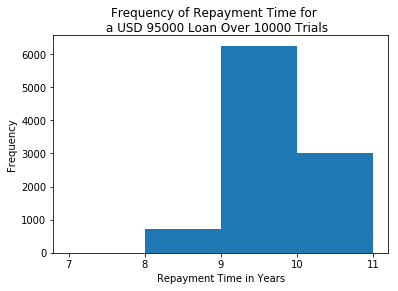

In [48]:
# Run the simulation with the new parameters
results_array_q4 = income_simulator(sig = sig_q4, av_start_income = inc_q4)
print("If average starting income increases by USD 5000 to USD 85000, and the variance increases to 0.15:")
loan_repayment(results_array = results_array_q4)
